<a href="https://colab.research.google.com/github/2802A/Leaf-infection-using-deep-learning/blob/main/Copy_of_Plant_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIR = '/content/drive/MyDrive/potato_dataset'

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle

In [ ]:
categories = ['Potato___Late_blight','Potato___healthy',"Potato___Early_blight" ]

data = []

for category in categories:
  path = os.path.join(DIR,category)
  label = categories.index(category)

  for img in os.listdir(path):
    imgpath = os.path.join(path,img)
    leaf = cv2.imread(imgpath,0)
    image = np.array(leaf).flatten()
    
    data.append([image,label])

print(len(data))

2147


In [ ]:
random.shuffle(data)
features = []
labels = []

for feature, label in data:
  features.append(feature)
  labels.append(label)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.8)

model = SVC(C=1, kernel='poly', gamma='auto' )
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [ ]:
xtrain[0].shape

(65536,)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

In [ ]:
prediction

array([0, 0, 2, ..., 0, 0, 0])

In [ ]:
print(accuracy)

0.819557625145518


Potato___Late_blight


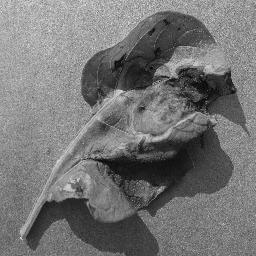

Potato___Late_blight


In [ ]:
i = random.randint(0,1718)
print(categories[prediction[i]])
cv2_imshow(xtest[i].reshape(256,256))
print(categories[ytest[i]])

In [ ]:
with open('SVM.pkl', 'wb') as f:
    pickle.dump(model, f)

<BarContainer object of 2 artists>

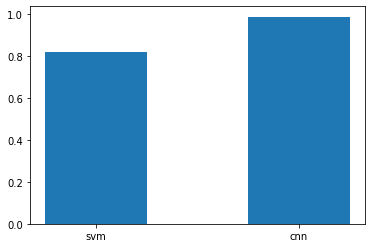

In [ ]:
x=np.array(["svm","cnn"])
y=np.array([0.819557625145518, 0.9861])
plt.bar(x,y,width=0.5)          

Text(69.0, 0.5, 'Truth')

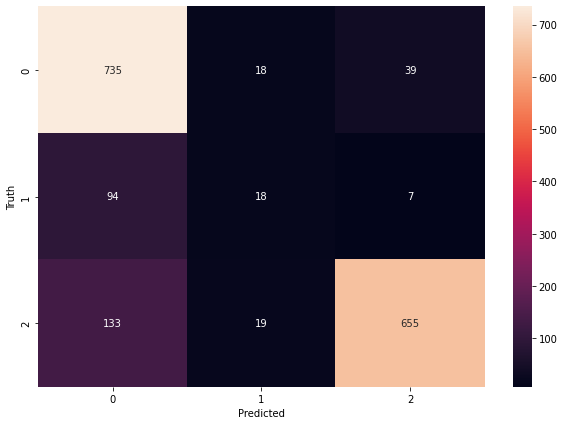

In [ ]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, prediction, target_names=categories))

                       precision    recall  f1-score   support

 Potato___Late_blight       0.76      0.93      0.84       792
     Potato___healthy       0.33      0.15      0.21       119
Potato___Early_blight       0.93      0.81      0.87       807

             accuracy                           0.82      1718
            macro avg       0.68      0.63      0.64      1718
         weighted avg       0.81      0.82      0.81      1718

